# Simulation de variables aléatoires

## Notebook jupyter
Le notebook est un document interactif, qui permet de mélanger du texte et des lignes de code (pour nous, c'est du code `python`). Il est possible d'exécuter le code, de le modifier, et d'ajouter (ou de supprimer) des cellules de code ou de commentaire. Vous avez la possibilité d'enregistrer les modifications par le bouton correspondant dans la barre à outils en haut. 

Pour lire ou éditer un notebook (fichier au format .ipynb) vous pouvez utiliser deux environnements qui s'ouvrent dans un navigateur web: 

- `jupyter notebook` la version classique qui ouvre un serveur sur l'adresse `http://localhost:8888/`
- `jupyter lab` la version plus moderne avec du code javascript pour "une IDE" plus dynamique `http://localhost:8888/lab`

Dans la cellule de code suivante, vous voyez des instructions en `python`. Pour les exécuter, il faut d'abord cliquer dans la cellule pour la sélectionner, puis faire `Shift+Enter`.

In [1]:
x = 17
x      # pour afficher la valeur de x on utilise print(x)
y = x + 3
y      # la dernière instruction est renvoyée, pour éviter l'affichage on peut mettre un ; à la fin: y; 

20

Les variables `x` et `y` sont désormais définies. Dans la suite, vous pouvez les utiliser et travailler avec. Autrement dit, les notebooks sont un moyen pour excécuter du code progressivement. 
Exécuter la cellule suivante pour calculer le carré de `y`.

In [2]:
y**2

400

Au fur et à mesure que vous exécutez des cellules de code, vous voyez apparaître des numéros entre crochets à gauche de la cellule. Ces numéros vous aident à garder une trace de l'ordre dans lequel vous exécutez les cellules. Juste pour voir, revenez à la première cellule de code et modifiez la valeur de `y`. Puis, réexécutez la cellule. Cela change la sortie de la première cellule, mais pas de la deuxième (alors que la valeur de `y` a changé). Les numéros entre crochets vous permettent donc de vous répérer plus facilement.

Parfois, quand on vient d'exécuter plein de cellules, on perd un peu le contrôle, et on ne sait plus quelles sont les valeurs actuelles des différentes variables. Dans ce cas, il vaut mieux de reprendre à zéro. Pour cela, sélectionnez **Kernel** en haut de la page et choissisez **Restart**. Vous pouvez observer que tous les numéros entre crochets disparaissent ainsi que toutes les sorties en-dessous des cellules de code. Un **Restart** du **Kernel** revient alors à supprimer tous les objets créés.

Vous pouvez modifier un notebook comme bon vous semble. Par exemple pour ajouter une cellule, cliquer sur le symbole **+** dans la barre à outils. Cela crée une nouvelle cellule juste en-dessous de la dernière cellule sélectionnée. Par défaut, il s'agit d'une cellule de code dans laquelle vous pouvez écrire des instructions en `python`. Si la nouvelle cellule doit contenir du texte, il suffit de modifier son type par le menu déroulant en changeant **Code** en **Markdown**. Le **Markdown** permet d'écrire du texte, le formatage est très simple. Si cela vous intéresse, double-cliquez sur les cellules de type **Markdown** dans ce notebook pour voir comment ajouter un titre, mettre du texte **en gras** ou *en italique*, créer une liste etc. N'oubliez pas qu'il faut aussi exécuter les cellules **Markdown** en appuyant sur la flèche vers la droite dans la barre à outils.

In [3]:
x = 17
print("x =", x)
y = x + 3
print("y =", y)

x = 17
y = 20


Pour des rappels sur le langage `python` et sur le module `numpy` nous renvoyons sur les pages suivantes:

- [rappels python](https://perso.lpsm.paris/~vlemaire/4ma074/tp/outils/bases_python.html): parcourir rapidement cette page pour se rafraichir la mémoire sur python
- [numpy array](https://perso.lpsm.paris/~vlemaire/4ma074/tp/outils/numpy.html): structure de donnée que l'on utilisera tout au long de ce cours: **à connaitre rapidement!** 

Dans la cellule suivante, on charge les modules que l'on utilisera pendant ces séances de TP. 

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns # pour des jolis plot
sns.set_theme() 

## Nombres pseudo-aléatoires

Depuis la version 1.17 de `numpy` en juillet 2019, le module `random` a évolué. Vous trouverez encore beaucoup de code sur internet ou dans des livres qui n'utilisent pas la nouvelle syntaxe de ce module, mais dans ce cours nous utiliserons cette nouvelle syntaxe. La différence majeure (en dehors des algorithmes utilisés en interne) est l'utilisation d'un **objet** que nous appelerons `rng` de type `Generator` qui correspond au générateur de nombres pseudo-aléatoires. Pour simuler une loi classique on fera appel à **une méthode**. 

Par défaut, l'algorithme utilisé est le `PCG64` à la différence du Mersenne-Twister qui était le standard auparavant. 

Exécuter les commandes suivantes.

In [5]:
import numpy as np
from numpy.random import default_rng

rng = default_rng()
print("Le type de l'objet rng est: ", rng)
print("Les méthodes utilisables avec l'objet rng sont:\n", dir(rng))

Le type de l'objet rng est:  Generator(PCG64)
Les méthodes utilisables avec l'objet rng sont:
 ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '_bit_generator', '_poisson_lam_max', 'beta', 'binomial', 'bit_generator', 'bytes', 'chisquare', 'choice', 'dirichlet', 'exponential', 'f', 'gamma', 'geometric', 'gumbel', 'hypergeometric', 'integers', 'laplace', 'logistic', 'lognormal', 'logseries', 'multinomial', 'multivariate_hypergeometric', 'multivariate_normal', 'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal', 'pareto', 'permutation', 'permuted', 'poisson', 'power', 'random', 'rayleigh', 'shuffle', 'spawn', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal',

L'objet `rng` est défini une fois pour toute et tout l'aléatoire de notre code se fera par des appels à des méthodes de cet objet. C'est un peu comme si on fixait un espace de probabilité $(\Omega, \mathcal{A}, \mathbf{P})$ (notre espace de simulation) et que l'on construisait toutes les variables aléatoires sur cet espace.

Vérifions tout d'abord que les nombres pseudo-aléatoires produits $(X_1, \dots, X_n)$ sont uniforméments répartis et qu'il y a indépendance entre 2 tirages $X_k$ et $X_{k+1}$ pour $k=1,\dots,n-1$. On fait cette vérification uniquement visuellement en traçant l'histogramme de l'échantillon $(X_1, \dots, X_n)$ et le nuage de points des paires adjacentes $(X_k, X_{k+1})_{k=1,\dots,n-1}$ (ce nuage doit remplir uniformément le carré unité $[0,1]\times[0,1]$).

Voici le graphique obtenu avec un échantillon de taille $n = 100\,000$.

![](img/pseudo_alea.png)

### Question: `rng.random`
Lire la documentation de la fonction `rng.random`. Construire un échantillon `sample` de taille `100000`. Reproduire le graphe de l'histogramme de `sample` et des paires adjacentes ci-dessus (le nombre de `bins` pour l'histogramme est 20 et la taille d'un point est `s=0.5` de transparence `alpha=0.2`).

In [6]:
?rng.random
size = 100000
sample = rng.random(size=size)

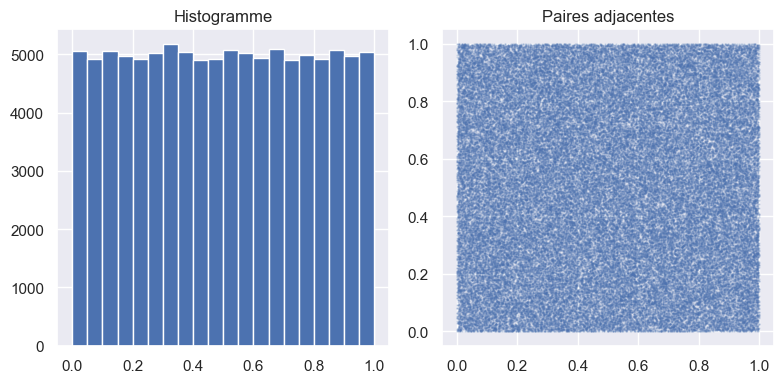

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), layout='tight')
ax1.hist(sample, bins=20)
ax1.set_title('Histogramme')
ax2.scatter(sample[:-1], sample[1:], s=0.5, alpha=0.2)
ax2.set_title('Paires adjacentes')
plt.show()
#plt.savefig('img/pseudo_alea.png')

## La loi exponentielle

On considère la loi exponentielle de paramètre $\lambda = 2$. On rappelle la densité $f_\lambda$ et l'inverse de la fonction de répartition (la fonction quantile) $F_\lambda^{-1}$

$$
f_\lambda(x) = \lambda e^{-\lambda x} \mathbf{1}_{x > 0} \quad \text{et} \quad \forall u \in [0, 1[, \; F_\lambda^{-1}(u) = \frac{-\log(1-u)}{\lambda}.
$$


### Question: 2 façons de simuler

On veut comparer 2 échantillons de taille $n = 10\,000$ de la loi $\mathcal{E}(\lambda)$, $\lambda = 2$:

- le premier `sample_numpy` obtenu par un appel de `rng.exponential`
- le second `sample_quantile` obtenu par transformation par $F_\lambda^{-1}$ d'un échantillon $(U_1, \dots, U_n)$ _i.i.d._ avec $U_i \sim \mathcal{U}([0, 1[)$.

Vérifier que la moyenne de chacun de ces échantillons est proche de $\frac{1}{\lambda}$.

In [8]:
lambd = 2
size = 10000
sample_numpy = rng.exponential(scale=1/lambd, size=size) # attention piège: il faut lire la doc! 
print("Empirical mean: ", sample_numpy.mean())

unifs = rng.random(size=size)
sample_quantile = -np.log(unifs) / lambd 
print("Empirical mean: ", sample_quantile.mean())

Empirical mean:  0.4978006219455834
Empirical mean:  0.5055516057582476


### Question: représentation graphique

On compare graphiquement les histogrammes de ces échantillons `sample_numpy` et `sample_quantile` avec la densité de la loi exponentielle (de paramètre $\lambda=2$). Ecrire le code pour obtenir le graphique suivante:

![](img/expo.png)

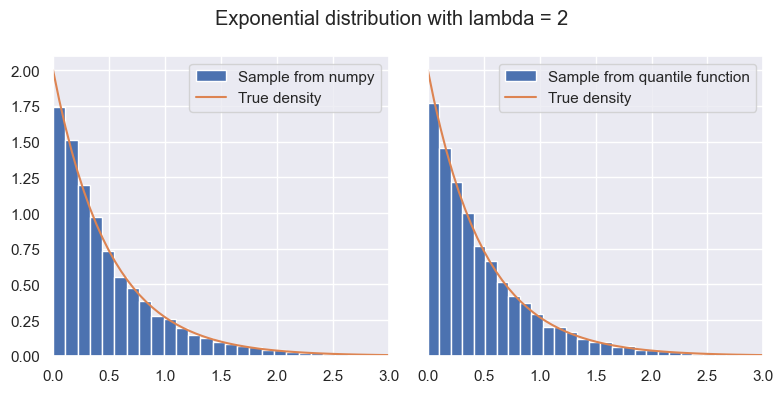

In [9]:
m = max(sample_numpy.max(), sample_quantile.max())
u = np.linspace(0, m, 100)
f_u = lambd * np.exp(-lambd * u)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True, layout='tight')
ax1.hist(sample_numpy, bins=50, density=True, label="Sample from numpy")
ax2.hist(sample_quantile, bins=50, density=True, label="Sample from quantile function")
for ax in (ax1, ax2):
    ax.plot(u, f_u, label="True density")
    ax.set_xlim(0, 3)
    ax.legend()
fig.suptitle(f"Exponential distribution with lambda = {lambd}")
plt.show()
#plt.savefig('img/expo.png')

### Question: utilisation de `scipy.stats`

Reprendre les 2 questions précédentes en utilisant un objet `E` de classe `stats.expon`. Lire la documentation de cette classe et utiliser les méthodes `rvs` (avec l'argument `random_state=rng`), `ppf` et `pdf`. Le but est d'écrire un code qui pourrait s'executer avec n'importe quelle loi à densité (une classe qui contient un méthode `pdf` et non `pmf`). 

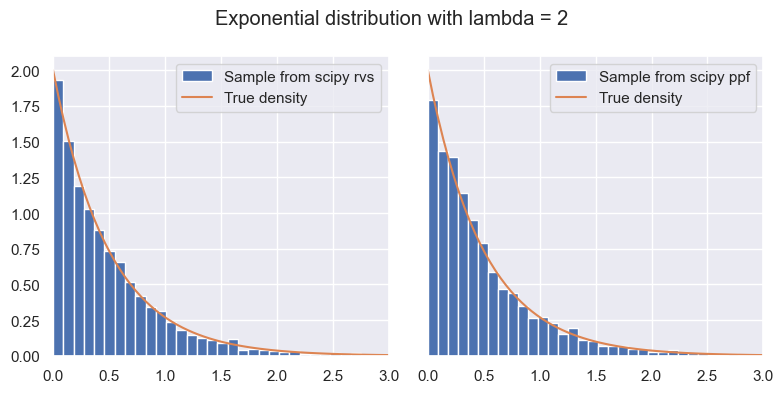

In [10]:
from scipy import stats

E = stats.expon(scale=1/lambd) # attention piège: il faut lire la doc! 
sample_scipy = E.rvs(size=5000, random_state=rng)

unifs = rng.random(size=5000)
sample_ppf = E.ppf(unifs)

m = max(sample_scipy.max(), sample_ppf.max())
u = np.linspace(0, m, 100)
f_u = E.pdf(u)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True, layout='tight')
ax1.hist(sample_scipy, bins=50, density=True, label="Sample from scipy rvs")
ax2.hist(sample_ppf, bins=50, density=True, label="Sample from scipy ppf")
for ax in (ax1, ax2):
    ax.plot(u, f_u, label="True density")
    ax.set_xlim(0, 3)
    ax.legend()
fig.suptitle(f"Exponential distribution with lambda = {lambd}")
plt.show()

## Illustration de la méthode du rejet

On propose d'illustrer la méthode du rejet dans le cas d'une loi bêta de paramètres $\alpha > 1$ et $\beta > 1$. On rappelle la forme de la densité de la loi

$$
  f_{\alpha, \beta}(x) = \frac{1}{B(\alpha, \beta)} 
  x^{\alpha-1} (1-x)^{\beta-1} \mathbf{1}_{[0,1]}(x)
$$

où $B(\alpha, \beta)$ est la constante de normalisation de la loi. 

### Question: illustration du rejet

Le but est de créer le graphique suivant représentant la méthode du rejet pour une loi bêta de paramètres $\alpha = 1.5$ et $\beta = 3$ et une loi auxiliaire qui est la loi uniforme sur $[0,1]$, c'est à dire $g(x) = \mathbf{1}_{[0,1]}(x)$. La ligne rouge represente $c g(x)$ avec $c = 2$, la courbe bleue correspond à la densité $f_{\alpha, \beta}$, les points bleus sont les réalisations acceptées (parmi 5000 réalisations) et les points orangés sont les réalisations rejetées.

![](img/rejet.png)

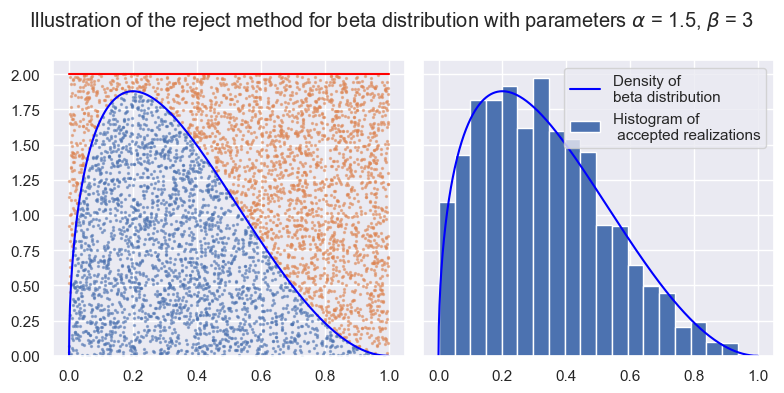

In [11]:
alpha, beta = 1.5, 3
c = 2
size = 5000
distrib = stats.beta(a=alpha, b=beta)

sample = rng.random(size=size)
unif_test = rng.random(size=size)
accepted = unif_test * c < distrib.pdf(sample)
rejected = np.logical_not(accepted) # ou bien ~accepted ou bien (1-accepted).astype(bool)

xx = np.linspace(0, 1, 1000)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True, layout='tight')
ax1.plot(xx, distrib.pdf(xx), color='blue')
ax1.scatter(sample[accepted], c*unif_test[accepted], s=2, alpha=0.5)
ax1.plot(xx, 2*np.ones_like(xx), color='red')
ax1.scatter(sample[rejected], c*unif_test[rejected], s=2, alpha=0.5)

ax2.plot(xx, distrib.pdf(xx), color='blue', label='Density of \nbeta distribution')
ax2.hist(sample[accepted], bins=20, density=True, color='C0', label='Histogram of\n accepted realizations')
ax2.legend(loc='upper right')
fig.suptitle(fr'Illustration of the reject method for beta distribution with parameters $\alpha$ = {alpha}, $\beta$ = {beta}')
plt.show()
#plt.savefig('img/rejet.png')

### Question: optimisation de la constante $c$ 

La constante optimale $c$ que l'on peut utiliser dans cet exemple (en considérant $g(x) = \mathbf{1}_{[0,1]}(x)$) est $c^* = \max_{x \in [0,1]} f_{\alpha, \beta}(x)=f_{\alpha,\beta}(x^*)$. On peut calculer explicitement ce maximum qui correspond au mode de la distribution bêta

$$
    x^* = \operatorname{argmax}_{x \in [0,1]} f_{\alpha, \beta}(x) = \frac{\alpha-1}{\alpha + \beta - 2} \quad \text{pour $\alpha > 1, \beta > 1$}.
$$

Dans un cas plus général on ne connaît pas forcément ce maximum mais on peut l'approcher et trouver une approximation par un algorithme type dichotomie ou descente de gradient (méthode de Newton). 

Utiliser la fonction `scipy.optimize.minimize_scalar` (après avoir lu la documentation) avec les options `bounds=(0, 1)` et `method="bounded"` pour trouver la valeur $c^*$.

In [12]:
from scipy import optimize
res = optimize.minimize_scalar(lambda x: -distrib.pdf(x), bounds=(0,1), method="bounded")
print(res)
c = -res.fun
print("Optimal value: ", c)

 message: Solution found.
 success: True
  status: 0
     fun: -1.8782971010629732
       x: 0.19999841528795134
     nit: 11
    nfev: 11
Optimal value:  1.8782971010629732


## Loi binomiale: définition probabiliste _vs_ inverse de la fonction de répartition

On veut comparer deux algorithmes pour la simulation d'une loi binomiale $X \sim B(n, p)$, $n \ge 2$, $p \in ]0,1[$.

- Le premier algorithme utilise la définition de la loi binomiale comme somme de $n$ variables aléatoires $(B_1, \dots, B_n)$ indépendantes de Bernoulli de paramètre $p \in ]0,1[$, $\mathbf{P}[B_1 = 1] = p = 1 - \mathbf{P}[B_1 = 0]$, 

$$
  X = \sum_{k=1}^n B_k. 
$$ 

- Le deuxième algorithme utilise l'inverse de la fonction de répartition de la loi binomiale. 

### Question: algorithme 1.

Compléter la fonction `binomial_from_def` qui implémente naïvement le premier algorithme et renvoie un échantillon de taille `size`. Attention cette première approche (la plus naturelle quand on débute) sera améliorée dans la suite. Ce n'est pas la façon optimale d'écrire le code en `numpy`.
```
def binomial_from_def(size: int, n: int=2, p: float=0.5):
    """ 
    Draw samples from a binomial distribution B(n, p).
    Algorithm: first implementation of sum of independent Bernoulli trials.
    """
    def one_realization():
        # code à écrire
    # code à écrire
    return sample
```

Vérifier que le code est correct en traçant l'histogramme d'un échantillon de taille $10\,000$. Vous devez obtenir ce graphique:

![](img/binom_def.png)

In [13]:
def binomial_from_def(size: int, n: int=2, p: float=0.5):
    """ 
    Draw samples from a binomial distribution B(n, p).
    Algorithm: first implementation of sum of independent Bernoulli trials.
    """
    def one_realization():
        unifs = rng.random(size=n)
        bernoullis = unifs < p
        return bernoullis.sum()
    result = [ one_realization() for _ in range(size) ]
    sample = np.array(result)
    return sample

**Remarque** dans le code précédent on insiste sur le fait qu'on simule réalisation par réalisation avec l'utilisation de la fonction `one_realization()`. Une façon plus standard d'écrire ce code est la suivante 
```{python}
def binomial_from_def(size: int, n: int=2, p: float=0.5):
    """ 
    Draw samples from a binomial distribution B(n, p).
    Algorithm: first implementation of sum of independent Bernoulli trials.
    """
    sample = np.empty(size)
    for k in range(size):
        unifs = rng.random(size=n)
        sample[k] = np.sum(unifs < p)
    return sample 
```

In [14]:
def binomial_from_def(size: int, n: int=2, p: float=0.5):
    """ 
    Draw samples from a binomial distribution B(n, p).
    Algorithm: first implementation of sum of independent Bernoulli trials.
    """
    sample = np.empty(size, dtype=np.int64)
    for k in range(size):
        unifs = rng.random(size=n)
        sample[k] = np.sum(unifs < p)
    return sample 

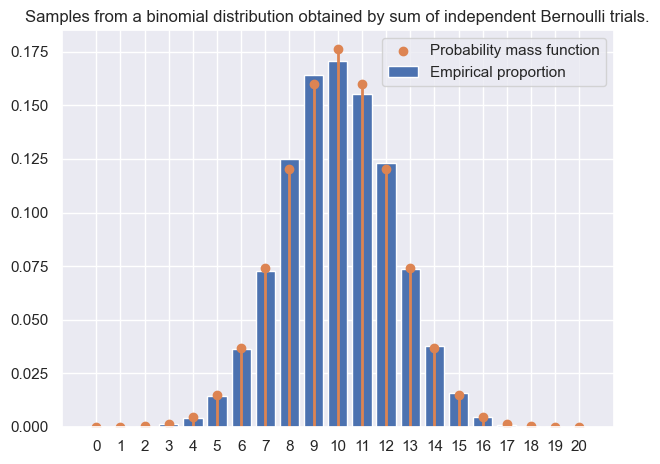

In [15]:
size = 10000
n, p = 20, 0.5
sample_from_def = binomial_from_def(size=size, n=n, p=p)

support = np.arange(n+1)
empirical_prop = np.bincount(sample_from_def, minlength=n+1) / size
binom = stats.binom(n = n, p = p)

fig, ax = plt.subplots(layout="tight")
ax.bar(support, empirical_prop, label='Empirical proportion')
ax.scatter(support, binom.pmf(support), label='Probability mass function')
ax.vlines(support, 0, binom.pmf(support), color='C1', lw=2, alpha=1)
ax.set_title('Samples from a binomial distribution obtained by sum of independent Bernoulli trials.')
ax.set_xticks(np.linspace(0,20,21))
ax.legend()
plt.show()
#plt.savefig('img/binom_def.png')

### Question: algorithme 2. 

Ecrire une fonction `binomial_quantile` similaire à celle de la question précédente: qui prend les mêmes arguments et qui renvoie un échantillon de taille `size`. Vérifier graphiquement que l'échantillon produit vérifie la bonne distribution.

In [16]:
def binomial_quantile(size: int, n: int=2, p: float=0.5):
    """ 
    Draw samples from a binomial distribution B(n, p).
    Algorithm: quantile function of the binomial distribution.
    """
    binom = stats.binom(n = n, p = p)
    unifs = rng.random(size = size)
    sample = binom.ppf(unifs).astype(np.int64)
    return sample

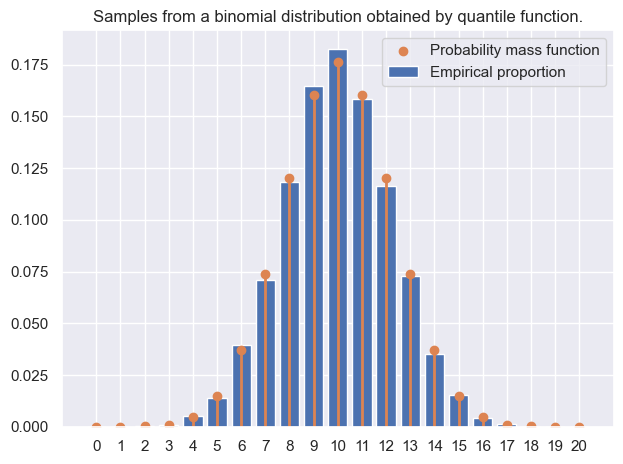

In [17]:
size = 10000
n, p = 20, 0.5
sample_quantile = binomial_quantile(size=size, n=n, p=p)

support = np.arange(n+1)
empirical_prop = np.bincount(sample_quantile, minlength=n+1) / size
binom = stats.binom(n = n, p = p)

fig, ax = plt.subplots(layout="tight")
ax.bar(support, empirical_prop, label='Empirical proportion')
ax.scatter(support, binom.pmf(support), label='Probability mass function')
ax.vlines(support, 0, binom.pmf(support), color='C1', lw=2, alpha=1)
ax.set_title('Samples from a binomial distribution obtained by quantile function.')
ax.set_xticks(np.linspace(0,20,21))
ax.legend()
plt.show()

### Question: temps de calcul

Pour mesurer le temps de calcul, on utilisera le module `timeit` de python. Dans l'environnement `jupyter` il est encore plus facile d'utiliser ce module grâce à une _magic_ commande appelée `%timeit`. Pour en savoir plus sur ces _magic_ commandes vous pouvez [consulter cette page de documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

Pour mesurer le temps de calcul complet d'une cellule notebook on utilise `%%timeit`. Le résultat est une moyenne de plusieurs exécutions.

Pour mesurer le temps d'une seule instruction on utiliser `%timeit` en début de ligne. L'option `-o` permet de sauvegarder le résultat: les mesures des temps d'exécutions et les statistiques associées.

In [18]:
size = 10000
%timeit liste = [i for i in range(size)] # pas de sauvegarde du résultat

114 μs ± 406 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
timings = %timeit -o liste = [i for i in range(size)]
print(dir(timings))
print("Mean time: ", timings.average)

116 μs ± 3.84 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_precision', '_repr_pretty_', 'all_runs', 'average', 'best', 'compile_time', 'loops', 'repeat', 'stdev', 'timings', 'worst']
Mean time:  0.00011606100355690745


Comparer les temps d'exécutions des 2 fonctions `binomial_from_def` et `binomial_quantile` pour différentes valeurs de `size` (par exemple `10000` et `100000`) et de `n` (par exemple `20`, `50` et `200`).

In [20]:
%%script echo skipping # remove to execute the cell
for n in (20, 50, 200):
    for size in (10000, 100000):
        print(f"Timing for algorithm 1. with n={n}, size={size}")
        %timeit binomial_from_def(size, n, p)

skipping # remove to execute the cell


In [21]:
%%script echo skipping # remove to execute the cell
for n in (20, 50, 200):
    for size in (10000, 100000):
        print(f"Timing for algorithm 2. with n={n}, size={size}")
        %timeit binomial_quantile(size, n, p)

skipping # remove to execute the cell


### Question: code plus efficace 

Le code de la fonction `binomial_from_def` n'est pas du tout optimal. En effet, en `numpy` (et dans la plupart des langages interprétés) lorsque c'est possible il faut simuler tout l'échantillon d'un coup sans boucle `for`. Dans l'algorithme 1., pour simuler un échantillon de taille `size` on a besoin de `size x n` variables de Bernoullis: on les simule donc d'un seul coup puis on somme uniquement sur l'axe 1 (c'est à dire l'axe de taille `n`). Cette réduction par axe donne un `np.array` de dimension 1 de taille `size`. 

Cette approche vectorielle est importante et sera utilisée dans la suite lorsque c'est possible.

Ecrire la fonction `binomial_from_def_vec` qui implémente l'algorithme 1. de façon efficace et comparer les temps de calculs avec les fonctions précédentes.

In [22]:
def binomial_from_def_vec(size: int, n: int=2, p: float=0.5):
    """ 
    Draw samples from a binomial distribution B(n, p).
    Algorithm: vectorized implementation of sum of independent Bernoulli trials.
    """
    unifs = rng.random(size=(size, n))
    bernoullis = unifs < p
    sample = bernoullis.sum(axis = 1)
    return sample

In [23]:
%%script echo skipping # remove to execute the cell
for n in (20, 50, 200):
    for size in (10000, 100000):
        print(f"Timing for algorithm 1. with n={n}, size={size}")
        %timeit binomial_from_def_vec(size, n, p)

skipping # remove to execute the cell


In [24]:
%%script echo skipping # remove to execute the cell
size = 100000
timings_quantile = {}
timings_from_def = {}
grid_n = [10, 20, 50, 100, 200, 400]
for n in grid_n:
    timings_quantile[n] = %timeit -o binomial_quantile(size, n, p)
    timings_from_def[n] = %timeit -o binomial_from_def_vec(size, n, p)

skipping # remove to execute the cell


In [25]:
%%script echo skipping # remove to execute the cell
t_quantile = [ t.average for t in timings_quantile.values() ] 
t_from_def = [ t.average for t in timings_from_def.values() ] 

fig, ax = plt.subplots(layout="tight")
ax.plot(grid_n, t_from_def, label="From definition")
ax.plot(grid_n, t_quantile, label="Quantile function")
ax.set_title(fr'Average time in function of $n$, size={size}')
ax.legend()
plt.show()

skipping # remove to execute the cell
